In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cares = pd.read_csv("../data/CARES_encoded_ignorecols.csv")
cares

,GENDER,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,AnaestypeCategory,PriorityCategory,AGEcategory,Mortality,thirtydaymortality,SurgRiskCategory,...,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay,Perioperativetransfusionwithin30days
0,0,1.0,1,NaN,0,0,2,0,0,0,...,0,0,0.0,0.0,0.0,0,1,0,0,0
1,1,2.0,1,NaN,0,0,3,0,0,1,...,0,0,0.0,0.0,0.0,0,1,0,0,1
2,1,1.0,0,59.0,0,0,3,1,0,0,...,0,0,0.0,1.0,1.0,0,1,0,0,0
3,1,0.0,1,NaN,0,1,2,0,0,0,...,0,0,0.0,0.0,0.0,0,0,1,0,0
4,0,0.0,0,NaN,0,0,1,0,0,1,...,0,0,1.0,0.0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70064,1,0.0,0,NaN,0,0,2,0,0,0,...,0,0,1.0,0.0,1.0,0,0,0,0,0
70065,0,0.0,0,NaN,0,0,4,0,0,0,...,0,0,2.0,0.0,1.0,0,0,0,0,0
70066,0,1.0,0,NaN,0,0,3,0,0,1,...,1,0,2.0,0.0,1.0,0,0,0,0,0
70067,1,2.0,1,NaN,0,1,2,0,0,0,...,1,0,0.0,0.0,NaN,0,0,0,0,0


In [4]:
cares.columns

Index(['GENDER', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'AnaestypeCategory', 'PriorityCategory',
       'AGEcategory', 'Mortality', 'thirtydaymortality', 'SurgRiskCategory',
       'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory',
       'DMinsulinRCRICategory', 'CreatinineRCRICategory',
       'GradeofKidneyCategory', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h',
       'Chinese', 'Indian', 'Malay', 'Perioperativetransfusionwithin30days'],
      dtype='object')

In [5]:
len(cares.columns)

23

In [6]:
cares.dtypes

GENDER                                    int64
Anemia category                         float64
PreopEGFRMDRD                             int64
DaysbetweenDeathandoperation            float64
AnaestypeCategory                         int64
PriorityCategory                          int64
AGEcategory                               int64
Mortality                                 int64
thirtydaymortality                        int64
SurgRiskCategory                          int64
CVARCRICategory                           int64
IHDRCRICategory                           int64
CHFRCRICategory                           int64
DMinsulinRCRICategory                     int64
CreatinineRCRICategory                    int64
GradeofKidneyCategory                   float64
RDW15.7                                 float64
ASAcategorybinned                       float64
ICUAdmgt24h                               int64
Chinese                                   int64
Indian                                  

In [7]:
RANDOM_SEED = 3402

In [8]:
np.random.seed(RANDOM_SEED)

In [9]:
from sklearn.model_selection import train_test_split

# Mortality

In [37]:
feature_columns = [
    'GENDER',
    'Anemia category',
    'PreopEGFRMDRD',
    'AnaestypeCategory',
    'PriorityCategory',
    'AGEcategory',
    'SurgRiskCategory',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'CreatinineRCRICategory',
    'GradeofKidneyCategory',
    'RDW15.7',
    'ASAcategorybinned',
    'Chinese',
    'Indian',
    'Malay',
    'Perioperativetransfusionwithin30days'
]

mortality_cares = cares[feature_columns + ['Mortality']]

In [38]:
mortality_cares.dropna(how='any')

,GENDER,Anemia category,PreopEGFRMDRD,AnaestypeCategory,PriorityCategory,AGEcategory,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,Chinese,Indian,Malay,Perioperativetransfusionwithin30days,Mortality
0,0,1.0,1,0,0,2,0,0,0,0,0,0,0.0,0.0,0.0,1,0,0,0,0
1,1,2.0,1,0,0,3,1,0,0,0,0,0,0.0,0.0,0.0,1,0,0,1,0
2,1,1.0,0,0,0,3,0,0,0,0,0,0,0.0,1.0,1.0,1,0,0,0,1
3,1,0.0,1,0,1,2,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0
4,0,0.0,0,0,0,1,1,0,0,0,0,0,1.0,0.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70062,0,0.0,0,0,0,2,1,0,0,0,0,0,1.0,0.0,0.0,1,0,0,0,0
70063,1,0.0,0,0,1,2,1,0,0,0,0,0,1.0,0.0,1.0,1,0,0,0,0
70064,1,0.0,0,0,0,2,0,0,0,0,0,0,1.0,0.0,1.0,0,0,0,0,0
70065,0,0.0,0,0,0,4,0,0,0,0,0,0,2.0,0.0,1.0,0,0,0,0,0


In [39]:
percent_missing = mortality_cares.isna().sum() / len(mortality_cares)
missing_value_df = pd.DataFrame({
    'column_name': mortality_cares.columns,
    'percent_missing': percent_missing
}).reset_index(drop=True)

missing_value_df

,column_name,percent_missing
0,GENDER,0.000000
1,Anemia category,0.002697
2,PreopEGFRMDRD,0.000000
3,AnaestypeCategory,0.000000
4,PriorityCategory,0.000000
5,AGEcategory,0.000000
6,SurgRiskCategory,0.000000
7,CVARCRICategory,0.000000
8,IHDRCRICategory,0.000000
9,CHFRCRICategory,0.000000


In [40]:
# All remaining NaN less than 5%. drop rows with nan value(s).
mortality_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_3035/4257491261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_cares.dropna(how='any', inplace=True)


In [41]:
mortality_X = mortality_cares.drop('Mortality', axis=1)
mortality_y = mortality_cares['Mortality']

In [42]:
mortality_x_train, mortality_x_test, mortality_y_train, mortality_y_test = train_test_split(mortality_X, mortality_y, test_size=0.3, random_state=RANDOM_SEED, stratify=mortality_y)

In [43]:
mortality_y_train.value_counts(normalize=True)

Mortality
0    0.924786
1    0.075214
Name: proportion, dtype: float64

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
mortality_x_res, mortality_y_res = SMOTE(random_state=RANDOM_SEED).fit_resample(mortality_x_train, mortality_y_train)

In [73]:
mortality_y_res.value_counts(normalize=True)

Mortality
0    0.5
1    0.5
Name: proportion, dtype: float64

### Simple Models
- Logistic Regression
- Random Forest
- XGBoost

In [46]:
model_evaluations = {}

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [48]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix

In [49]:
simple_models = {}

simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED)

# apply the same for smote data
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED)

simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [50]:
simple_models['Logistic Regression'].fit(mortality_x_train, mortality_y_train)
simple_models['Random Forest'].fit(mortality_x_train, mortality_y_train)
simple_models['XGBoost'].fit(mortality_x_train, mortality_y_train)

simple_models['Logistic Regression SMOTE'].fit(mortality_x_res, mortality_y_res)
simple_models['Random Forest SMOTE'].fit(mortality_x_res, mortality_y_res)
simple_models['XGBoost SMOTE'].fit(mortality_x_res, mortality_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3402, ...)

Model: Logistic Regression
F1 Score: 0.2025862068965517
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18375
           1       0.52      0.13      0.20      1494

    accuracy                           0.93     19869
   macro avg       0.73      0.56      0.58     19869
weighted avg       0.90      0.93      0.90     19869

AUC Score: 0.8473007676966369


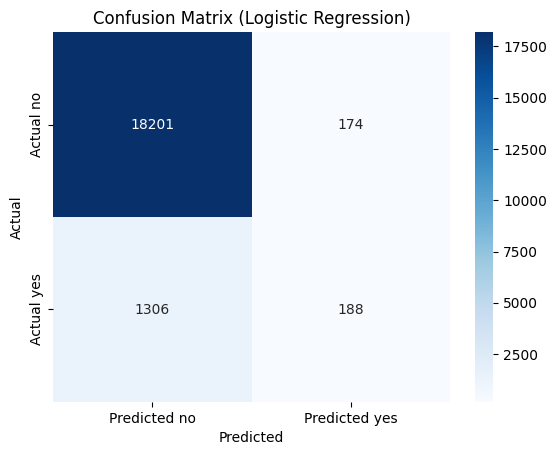

Model: Random Forest
F1 Score: 0.23376623376623376
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18375
           1       0.38      0.17      0.23      1494

    accuracy                           0.92     19869
   macro avg       0.66      0.57      0.59     19869
weighted avg       0.89      0.92      0.90     19869

AUC Score: 0.7942748772869255


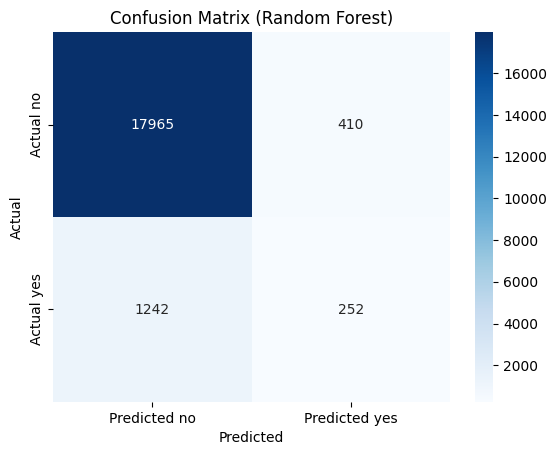

Model: Logistic Regression SMOTE
F1 Score: 0.3234893230349841
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     18375
           1       0.21      0.71      0.32      1494

    accuracy                           0.78     19869
   macro avg       0.59      0.75      0.59     19869
weighted avg       0.91      0.78      0.82     19869

AUC Score: 0.8314441074957426


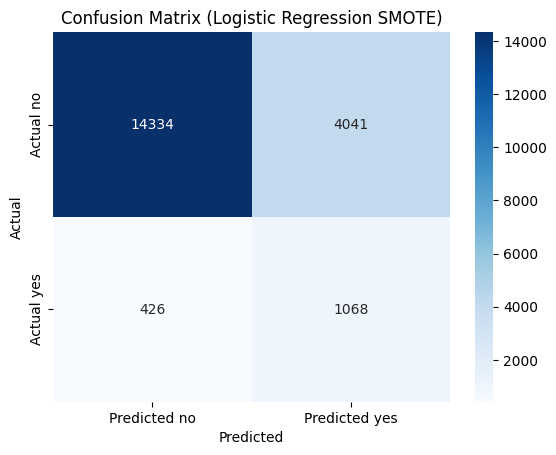

Model: Random Forest SMOTE
F1 Score: 0.2817497648165569
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     18375
           1       0.22      0.40      0.28      1494

    accuracy                           0.85     19869
   macro avg       0.58      0.64      0.60     19869
weighted avg       0.89      0.85      0.87     19869

AUC Score: 0.7385499549217277


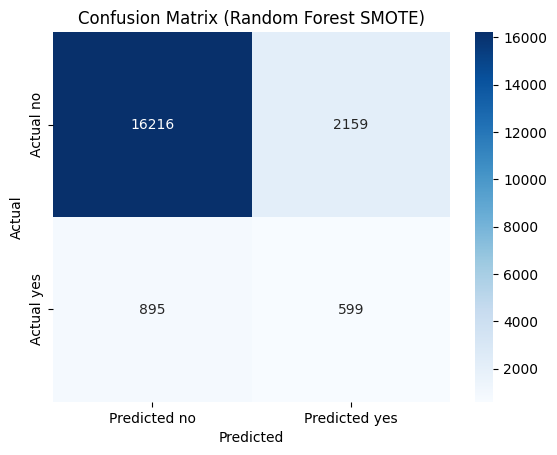

Model: XGBoost
F1 Score: 0.23269809428284854
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18375
           1       0.46      0.16      0.23      1494

    accuracy                           0.92     19869
   macro avg       0.70      0.57      0.60     19869
weighted avg       0.90      0.92      0.90     19869

AUC Score: 0.8483644145743975


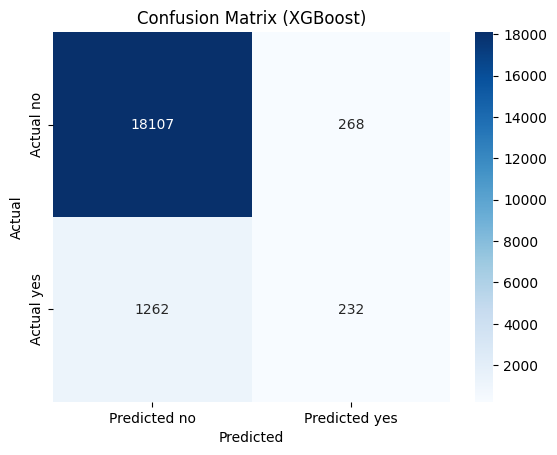

Model: XGBoost SMOTE
F1 Score: 0.3315660685154976
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     18375
           1       0.24      0.54      0.33      1494

    accuracy                           0.84     19869
   macro avg       0.60      0.70      0.62     19869
weighted avg       0.90      0.84      0.86     19869

AUC Score: 0.7942877359779252


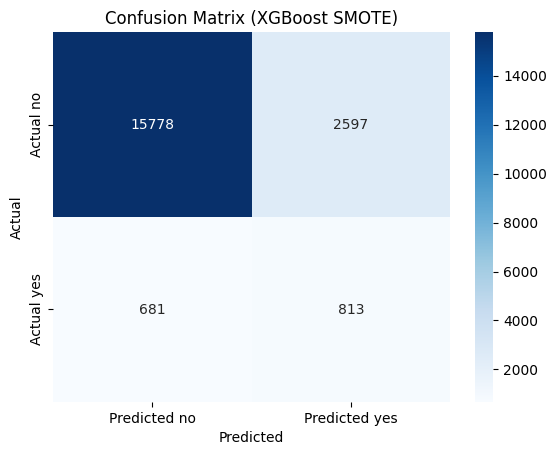

In [51]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(mortality_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(mortality_x_test)[:, 1]

    print(f"F1 Score: {f1_score(mortality_y_test, y_pred)}")
    print(classification_report(mortality_y_test, y_pred))
    fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(mortality_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

## Neural Network Model
Using TensorFlow

In [52]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

### Non-SMOTE

In [53]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(mortality_x_train, mortality_y_train, epochs=10, batch_size=32, validation_data=(mortality_x_test, mortality_y_test))

Epoch 1/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.6840 - f1_score: 0.1379 - loss: 0.2691 - val_auc: 0.8440 - val_f1_score: 0.1399 - val_loss: 0.2062
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - auc: 0.8445 - f1_score: 0.1420 - loss: 0.2068 - val_auc: 0.8523 - val_f1_score: 0.1399 - val_loss: 0.2034
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - auc: 0.8494 - f1_score: 0.1375 - loss: 0.2003 - val_auc: 0.8537 - val_f1_score: 0.1399 - val_loss: 0.2025
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - auc: 0.8589 - f1_score: 0.1407 - loss: 0.1991 - val_auc: 0.8550 - val_f1_score: 0.1399 - val_loss: 0.2028
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8664 - f1_score: 0.1384 - loss: 0.1938 - val_auc: 0.8559 - val_f1_score: 0.1399 - val_loss: 0.2008
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - auc: 0.8637 - f1_score: 0.1394 - loss: 0.1946 - val_auc: 0.8555 - val_f1_score: 0.1399 - val_loss: 0.2016
Epoch 7/10
1449/

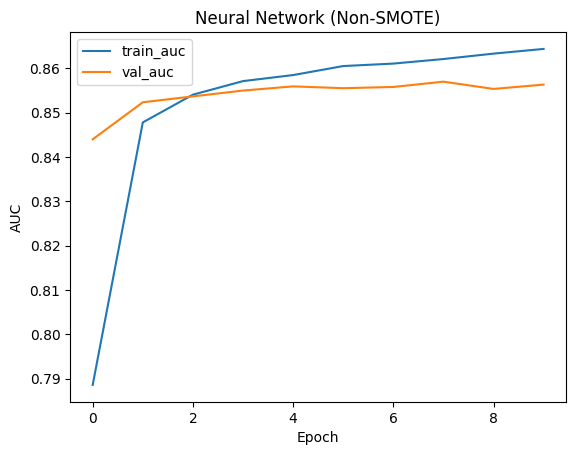

In [57]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [58]:
y_pred_proba = model.predict(mortality_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step


In [59]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [60]:
f1_score(mortality_y_test, y_pred)

0.21148684916800858

In [61]:
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
auc(fpr, tpr)

0.8564619657769399

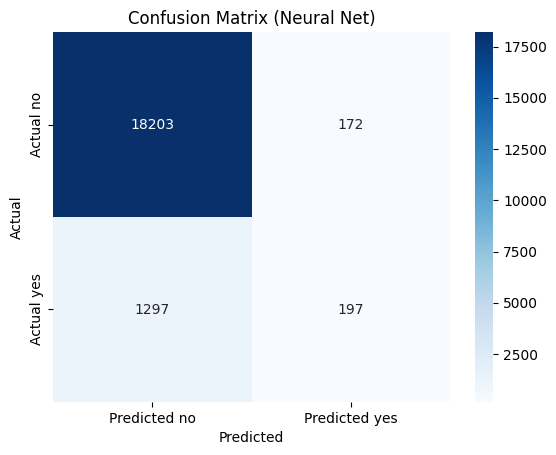

In [62]:
conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

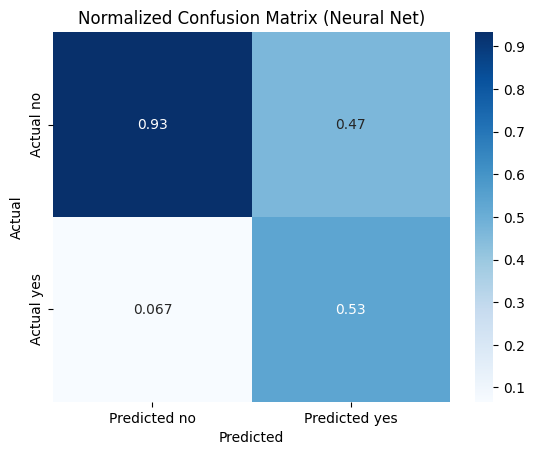

In [63]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [64]:
precision, recall, _ = precision_recall_curve(mortality_y_test, y_pred_proba)

In [65]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [38]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [39]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [40]:
model_smote.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model_smote.fit(mortality_x_res, mortality_y_res, epochs=10, batch_size=32, validation_data=(mortality_x_test, mortality_y_test))

Epoch 1/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - auc: 0.8333 - f1_score: 0.6647 - loss: 0.5036 - val_auc: 0.8332 - val_f1_score: 0.1399 - val_loss: 0.4783
Epoch 2/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8659 - f1_score: 0.6679 - loss: 0.4561 - val_auc: 0.8393 - val_f1_score: 0.1399 - val_loss: 0.4700
Epoch 3/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8702 - f1_score: 0.6665 - loss: 0.4487 - val_auc: 0.8365 - val_f1_score: 0.1399 - val_loss: 0.5094
Epoch 4/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - auc: 0.8748 - f1_score: 0.6655 - loss: 0.4416 - val_auc: 0.8286 - val_f1_score: 0.1399 - val_loss: 0.4427
Epoch 5/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8785 - f1_score: 0.6675 - loss: 0.4348 - val_auc: 0.8295 - val_f1_score: 0.1399 - val_loss: 0.4293
Epoch 6/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8818 - f1_score: 0.6663 - loss: 0.4290 - val_auc: 0.8237 - val_f1_score: 0.1399 - val_loss: 0.4708
Epoch 7/10
2680/

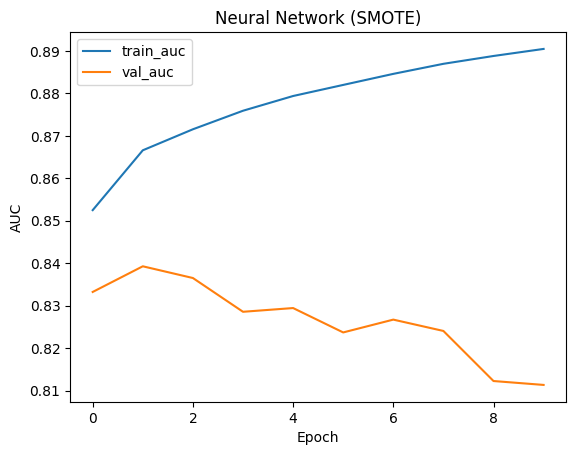

In [42]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [43]:
y_pred_proba = model_smote.predict(mortality_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step


In [44]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [45]:
f1_score(mortality_y_test, y_pred)

0.33271281096632255

In [46]:
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
auc(fpr, tpr)

0.8114351829085047

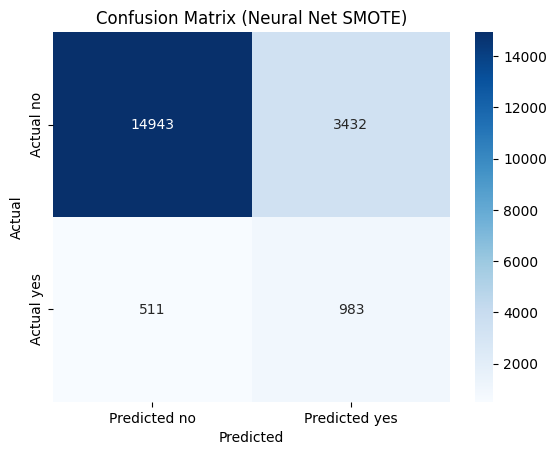

In [47]:
conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

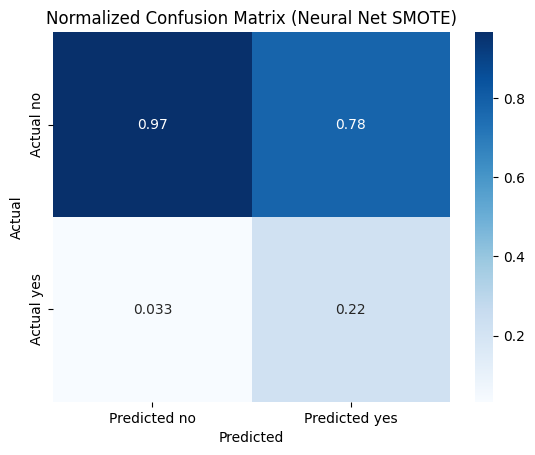

In [48]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [49]:
precision, recall, _ = precision_recall_curve(mortality_y_test, y_pred_proba)

In [50]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

## Comparisons

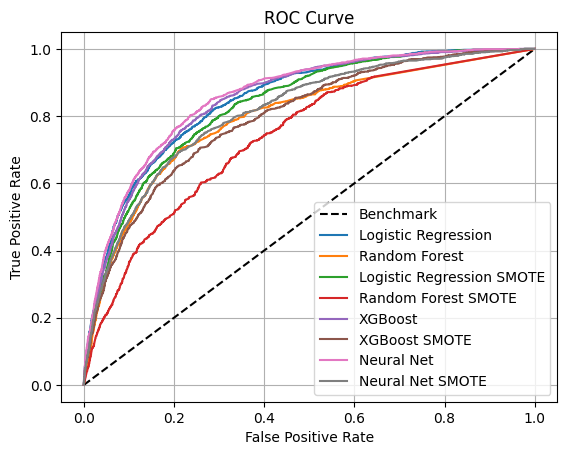

In [51]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

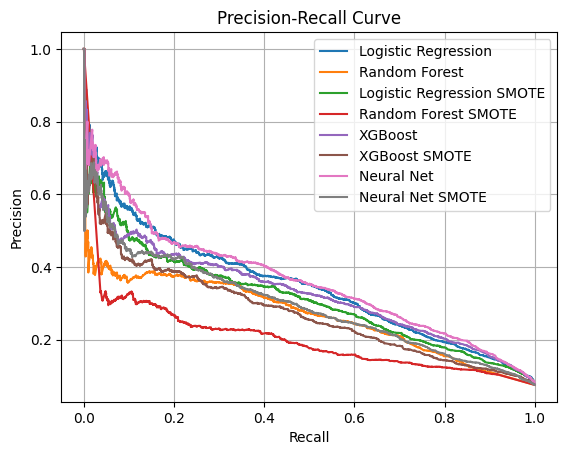

In [52]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [53]:
# coeff
coeffs = pd.DataFrame({
    'Feature': mortality_x_train.columns,
    'Coefficient': simple_models['Logistic Regression'].coef_[0]
})
coeffs

,Feature,Coefficient
0,GENDER,0.348229
1,Anemia category,0.461874
2,PreopEGFRMDRD,0.508032
3,AnaestypeCategory,-0.183462
4,PriorityCategory,0.351880
5,AGEcategory,0.389031
6,SurgRiskCategory,0.268945
7,CVARCRICategory,-0.005097
8,IHDRCRICategory,-0.132634
9,CHFRCRICategory,0.365065


# ICU

In [66]:
icu_cares = cares[feature_columns + ['ICUAdmgt24h']]

In [67]:
icu_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_3035/2832208095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_cares.dropna(how='any', inplace=True)


In [69]:
icu_cares.shape

(66230, 20)

In [68]:
icu_X = icu_cares.drop('ICUAdmgt24h', axis=1)
icu_y = icu_cares['ICUAdmgt24h']

In [70]:
icu_x_train, icu_x_test, icu_y_train, icu_y_test = train_test_split(icu_X, icu_y, test_size=0.3, random_state=RANDOM_SEED, stratify=icu_y)

In [74]:
icu_y_train.value_counts(normalize=True)

ICUAdmgt24h
0    0.98406
1    0.01594
Name: proportion, dtype: float64

In [71]:
icu_x_res, icu_y_res = SMOTE(random_state=RANDOM_SEED).fit_resample(icu_x_train, icu_y_train)

In [75]:
icu_y_res.value_counts(normalize=True)

ICUAdmgt24h
0    0.5
1    0.5
Name: proportion, dtype: float64

## Simple Models
- Logistic Regression
- Random Forest
- XGBoost

In [76]:
model_evaluations = {}

In [77]:
simple_models = {}

simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)

# default the same for smote data
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [78]:
simple_models['Logistic Regression'].fit(icu_x_train, icu_y_train)
simple_models['Random Forest'].fit(icu_x_train, icu_y_train)
simple_models['XGBoost'].fit(icu_x_train, icu_y_train)

simple_models['Logistic Regression SMOTE'].fit(icu_x_res, icu_y_res)
simple_models['Random Forest SMOTE'].fit(icu_x_res, icu_y_res)
simple_models['XGBoost SMOTE'].fit(icu_x_res, icu_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3402, ...)

Model: Logistic Regression
F1 Score: 0.07932011331444759
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19553
           1       0.38      0.04      0.08       316

    accuracy                           0.98     19869
   macro avg       0.68      0.52      0.54     19869
weighted avg       0.98      0.98      0.98     19869

AUC Score: 0.9033742758241636


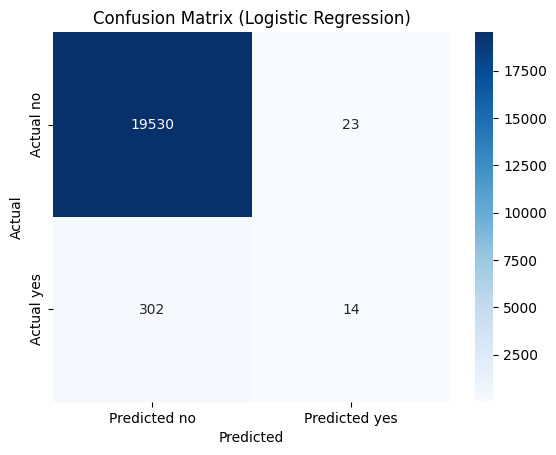

Model: Random Forest
F1 Score: 0.12351543942992874
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19553
           1       0.25      0.08      0.12       316

    accuracy                           0.98     19869
   macro avg       0.62      0.54      0.56     19869
weighted avg       0.97      0.98      0.98     19869

AUC Score: 0.8201330593188135


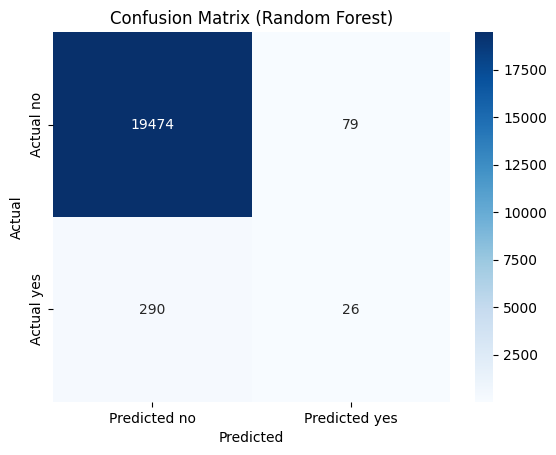

Model: Logistic Regression SMOTE
F1 Score: 0.1317808944165123
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     19553
           1       0.07      0.79      0.13       316

    accuracy                           0.83     19869
   macro avg       0.53      0.81      0.52     19869
weighted avg       0.98      0.83      0.90     19869

AUC Score: 0.8763450135852765


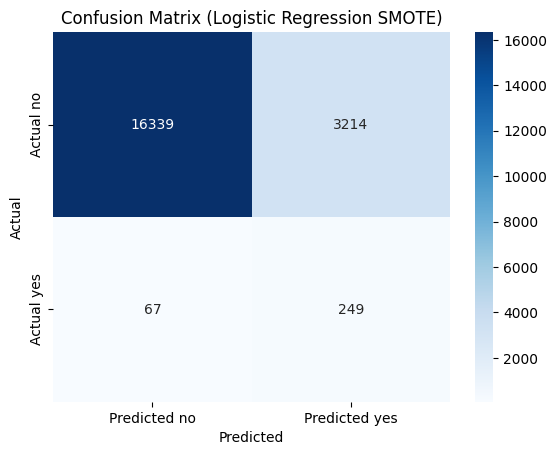

Model: Random Forest SMOTE
F1 Score: 0.06337599024984765
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     19553
           1       0.04      0.16      0.06       316

    accuracy                           0.92     19869
   macro avg       0.51      0.55      0.51     19869
weighted avg       0.97      0.92      0.95     19869

AUC Score: 0.7633266480523239


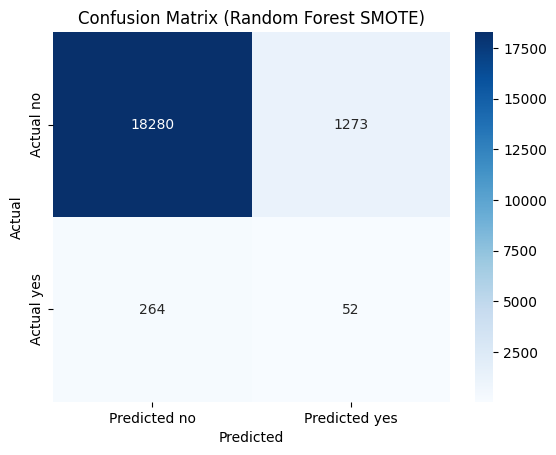

Model: XGBoost
F1 Score: 0.14035087719298245
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19553
           1       0.34      0.09      0.14       316

    accuracy                           0.98     19869
   macro avg       0.66      0.54      0.57     19869
weighted avg       0.98      0.98      0.98     19869

AUC Score: 0.8722733149175205


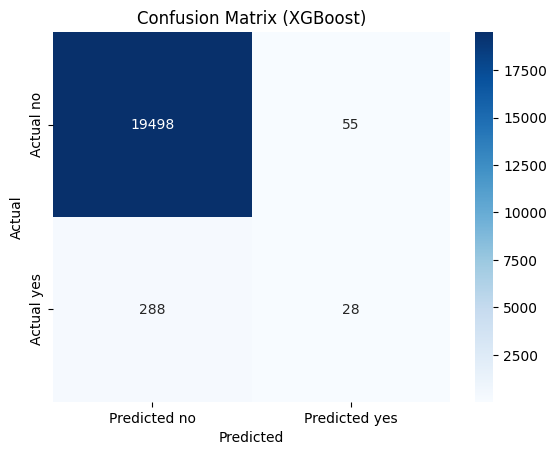

Model: XGBoost SMOTE
F1 Score: 0.11323003575685339
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     19553
           1       0.07      0.30      0.11       316

    accuracy                           0.93     19869
   macro avg       0.53      0.62      0.54     19869
weighted avg       0.97      0.93      0.95     19869

AUC Score: 0.7574706073139736


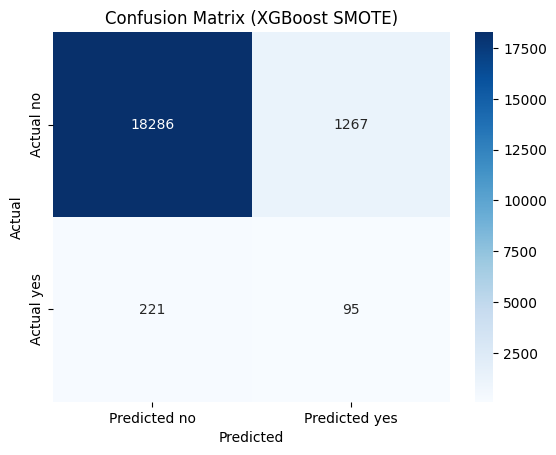

In [79]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(icu_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(icu_x_test)[:, 1]

    print(f"F1 Score: {f1_score(icu_y_test, y_pred)}")
    print(classification_report(icu_y_test, y_pred))
    fpr, tpr, _ = roc_curve(icu_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(icu_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(icu_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

## Neural Network Model
Using TensorFlow

### Non-SMOTE

In [80]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(icu_x_train, icu_y_train, epochs=10, batch_size=32, validation_data=(icu_x_test, icu_y_test))

Epoch 1/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.6364 - f1_score: 0.0315 - loss: 0.0987 - val_auc: 0.8798 - val_f1_score: 0.0313 - val_loss: 0.0600
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8720 - f1_score: 0.0304 - loss: 0.0603 - val_auc: 0.8732 - val_f1_score: 0.0313 - val_loss: 0.0595
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8880 - f1_score: 0.0320 - loss: 0.0604 - val_auc: 0.8913 - val_f1_score: 0.0313 - val_loss: 0.0585
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.9012 - f1_score: 0.0313 - loss: 0.0561 - val_auc: 0.8940 - val_f1_score: 0.0313 - val_loss: 0.0576
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8922 - f1_score: 0.0323 - loss: 0.0586 - val_auc: 0.8943 - val_f1_score: 0.0313 - val_loss: 0.0582
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8870 - f1_score: 0.0314 - loss: 0.0567 - val_auc: 0.9016 - val_f1_score: 0.0313 - val_loss: 0.0596
Epoch 7/10
1449/

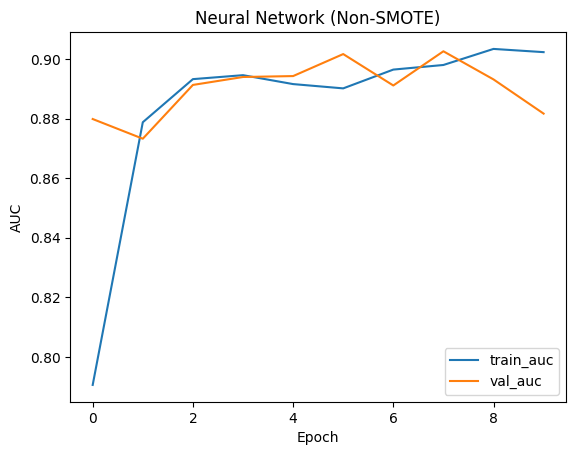

In [84]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [85]:
y_pred_proba = model.predict(icu_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step


In [86]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [87]:
f1_score(icu_y_test, y_pred)

0.05309734513274336

In [88]:
fpr, tpr, _ = roc_curve(icu_y_test, y_pred_proba)
auc(fpr, tpr)

0.9042370719763939

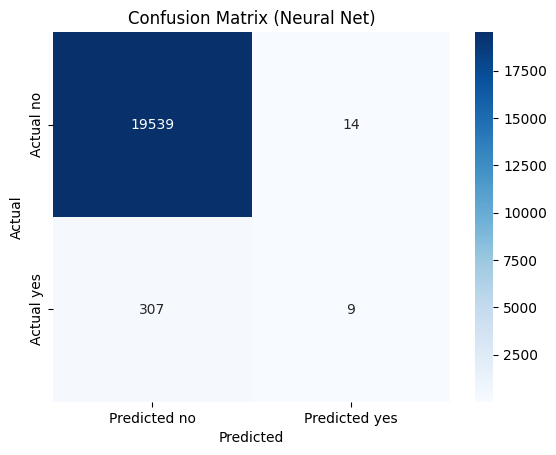

In [89]:
conf_mat = pd.DataFrame(confusion_matrix(icu_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

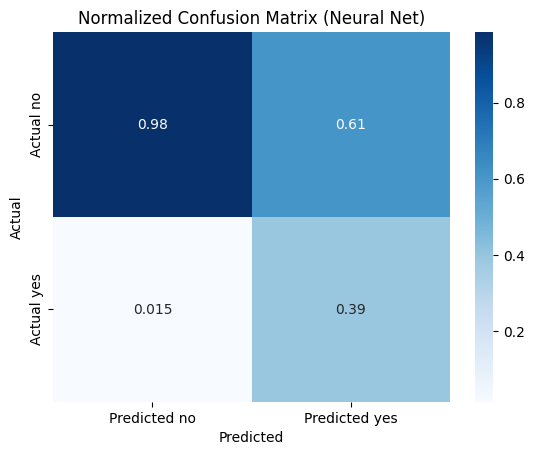

In [90]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [91]:
precision, recall, _ = precision_recall_curve(icu_y_test, y_pred_proba)

In [92]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [93]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [94]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [95]:
model_smote.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
history = model_smote.fit(icu_x_res, icu_y_res, epochs=10, batch_size=32, validation_data=(icu_x_test, icu_y_test))

Epoch 1/10
2852/2852 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - auc: 0.8960 - f1_score: 0.6651 - loss: 0.4025 - val_auc: 0.8661 - val_f1_score: 0.0313 - val_loss: 0.3899
Epoch 2/10
2852/2852 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - auc: 0.9328 - f1_score: 0.6668 - loss: 0.3269 - val_auc: 0.8457 - val_f1_score: 0.0313 - val_loss: 0.3707
Epoch 3/10
2852/2852 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - auc: 0.9419 - f1_score: 0.6664 - loss: 0.3036 - val_auc: 0.8334 - val_f1_score: 0.0313 - val_loss: 0.3754
Epoch 4/10
2852/2852 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - auc: 0.9488 - f1_score: 0.6667 - loss: 0.2847 - val_auc: 0.8132 - val_f1_score: 0.0314 - val_loss: 0.2931
Epoch 5/10
2852/2852 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - auc: 0.9522 - f1_score: 0.6685 - loss: 0.2738 - val_auc: 0.8211 - val_f1_score: 0.0314 - val_loss: 0.3761
Epoch 6/10
2852/2852 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - auc: 0.9559 - f1_score: 0.6701 - loss: 0.2630 - val_auc: 0.8209 - val_f1_score: 0.0316 - val_loss: 0.3012
Epoch 7/10
2852/

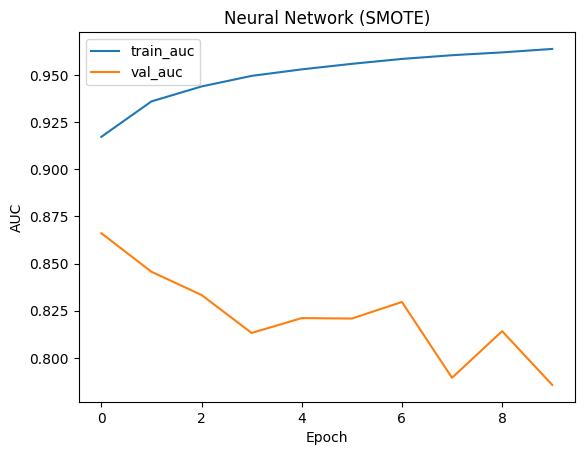

In [97]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [98]:
y_pred_proba = model_smote.predict(icu_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step


In [99]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [100]:
f1_score(icu_y_test, y_pred)

0.1160655737704918

In [101]:
fpr, tpr, _ = roc_curve(icu_y_test, y_pred_proba)
auc(fpr, tpr)

0.7918906872395508

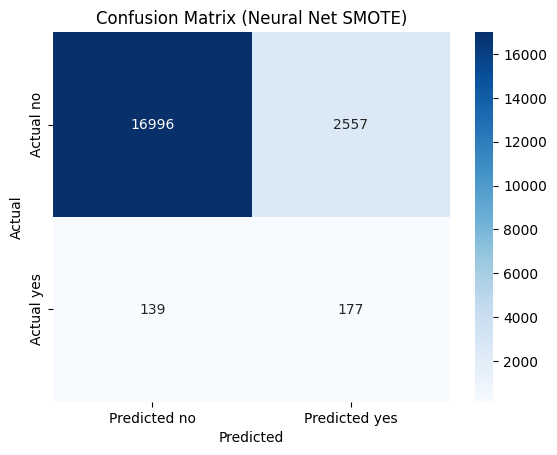

In [102]:
conf_mat = pd.DataFrame(confusion_matrix(icu_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

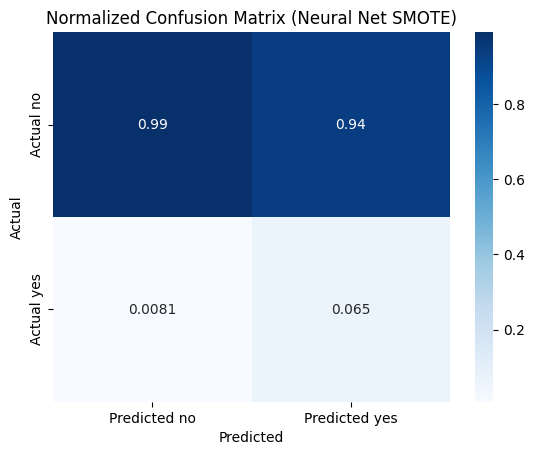

In [103]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [104]:
precision, recall, _ = precision_recall_curve(icu_y_test, y_pred_proba)

In [105]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

## Comparisons

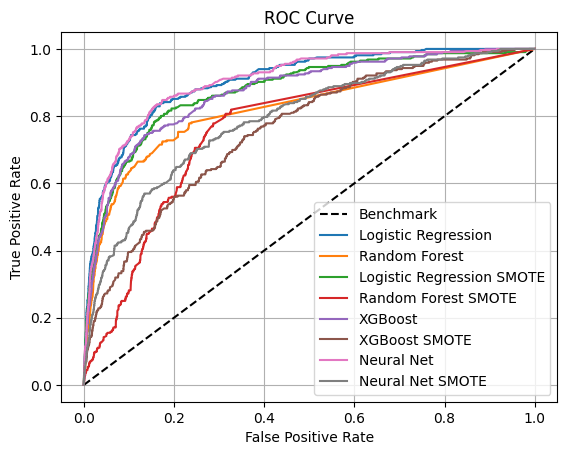

In [106]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

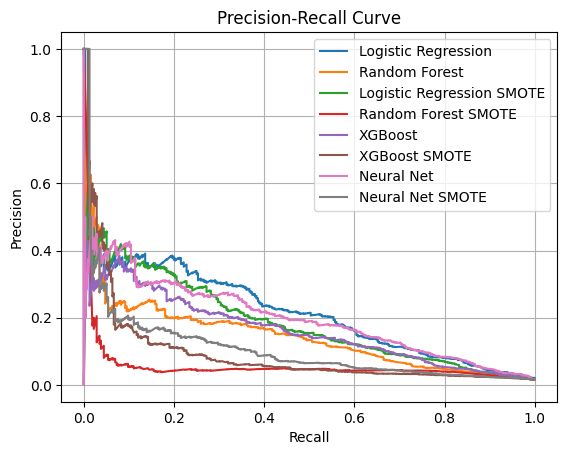

In [107]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Thirty Days Mortality

In [108]:
thirty_days_cares = cares[feature_columns + ['thirtydaymortality']]

In [109]:
thirty_days_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_3035/1318475980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirty_days_cares.dropna(how='any', inplace=True)


In [110]:
thirty_days_cares.shape

(66230, 20)

In [111]:
thirty_days_X = thirty_days_cares.drop('thirtydaymortality', axis=1)
thirty_days_y = thirty_days_cares['thirtydaymortality']

In [112]:
thirty_days_x_train, thirty_days_x_test, thirty_days_y_train, thirty_days_y_test = train_test_split(thirty_days_X, thirty_days_y, test_size=0.3, random_state=RANDOM_SEED, stratify=thirty_days_y)

In [114]:
thirty_days_y_train.value_counts(normalize=True)

thirtydaymortality
0    0.993184
1    0.006816
Name: proportion, dtype: float64

In [115]:
thirty_days_x_res, thirty_days_y_res = SMOTE(random_state=RANDOM_SEED).fit_resample(thirty_days_x_train, thirty_days_y_train)

In [118]:
thirty_days_y_res.value_counts(normalize=True)

thirtydaymortality
0    0.5
1    0.5
Name: proportion, dtype: float64

## Simple Models
- Logistic Regression
- Random Forest
- XGBoost

In [119]:
model_evaluations = {}

In [120]:
simple_models = {}

simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)

# default the same for smote data
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [122]:
simple_models['Logistic Regression'].fit(thirty_days_x_train, thirty_days_y_train)
simple_models['Random Forest'].fit(thirty_days_x_train, thirty_days_y_train)
simple_models['XGBoost'].fit(thirty_days_x_train, thirty_days_y_train)

simple_models['Logistic Regression SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)
simple_models['Random Forest SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)
simple_models['XGBoost SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3402, ...)

Model: Logistic Regression
F1 Score: 0.10810810810810811
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19734
           1       0.62      0.06      0.11       135

    accuracy                           0.99     19869
   macro avg       0.80      0.53      0.55     19869
weighted avg       0.99      0.99      0.99     19869

AUC Score: 0.9203940182201051


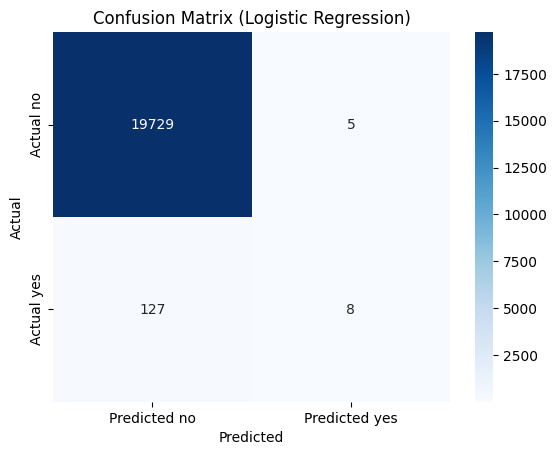

Model: Random Forest
F1 Score: 0.08588957055214724
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19734
           1       0.25      0.05      0.09       135

    accuracy                           0.99     19869
   macro avg       0.62      0.53      0.54     19869
weighted avg       0.99      0.99      0.99     19869

AUC Score: 0.7981410162569582


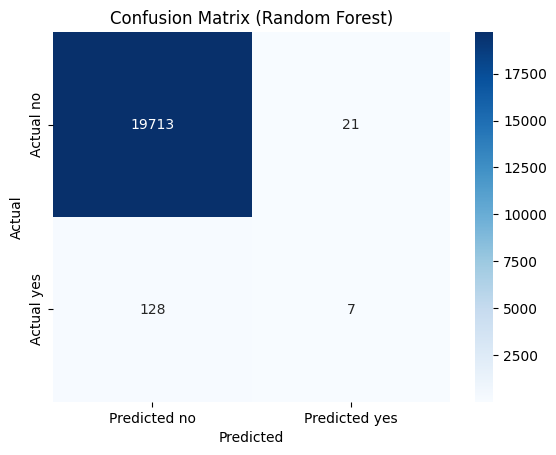

Model: XGBoost
F1 Score: 0.14201183431952663
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19734
           1       0.35      0.09      0.14       135

    accuracy                           0.99     19869
   macro avg       0.67      0.54      0.57     19869
weighted avg       0.99      0.99      0.99     19869

AUC Score: 0.8759255505632316


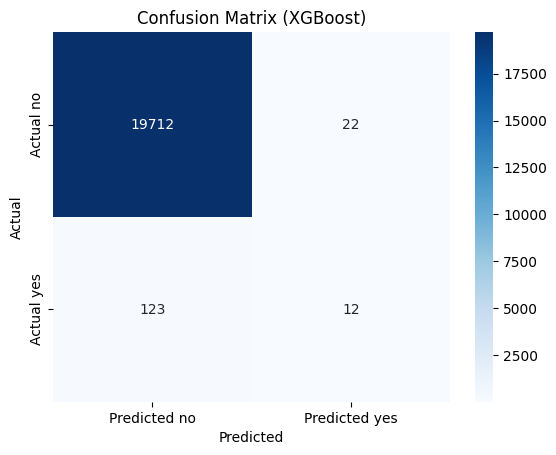

Model: Logistic Regression SMOTE
F1 Score: 0.07362831858407079
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     19734
           1       0.04      0.77      0.07       135

    accuracy                           0.87     19869
   macro avg       0.52      0.82      0.50     19869
weighted avg       0.99      0.87      0.92     19869

AUC Score: 0.8864897582288888


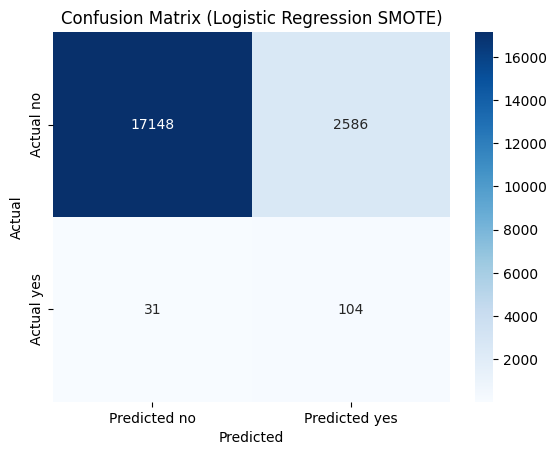

Model: Random Forest SMOTE
F1 Score: 0.09424083769633508
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19734
           1       0.07      0.13      0.09       135

    accuracy                           0.98     19869
   macro avg       0.53      0.56      0.54     19869
weighted avg       0.99      0.98      0.99     19869

AUC Score: 0.8198797713290468


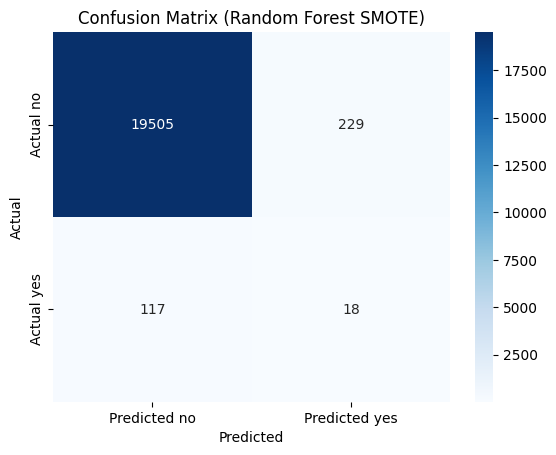

Model: XGBoost SMOTE
F1 Score: 0.08103727714748785
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19734
           1       0.05      0.19      0.08       135

    accuracy                           0.97     19869
   macro avg       0.52      0.58      0.53     19869
weighted avg       0.99      0.97      0.98     19869

AUC Score: 0.7886766212853169


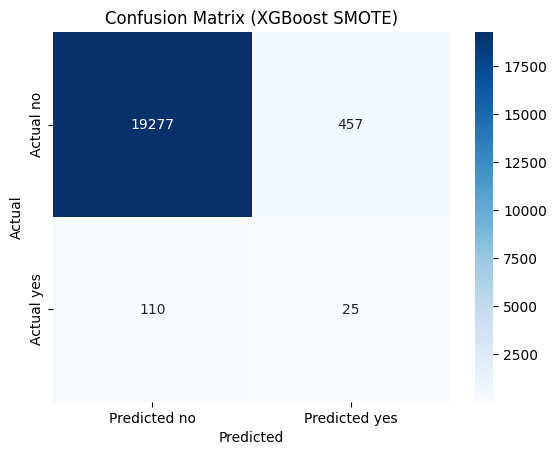

In [123]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(thirty_days_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(thirty_days_x_test)[:, 1]

    print(f"F1 Score: {f1_score(thirty_days_y_test, y_pred)}")
    print(classification_report(thirty_days_y_test, y_pred))
    fpr, tpr, _ = roc_curve(thirty_days_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(thirty_days_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(thirty_days_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

## Neural Network Model
Using TensorFlow

### Non-SMOTE

In [124]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [125]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [126]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
history = model.fit(thirty_days_x_train, thirty_days_y_train, epochs=10, batch_size=32, validation_data=(thirty_days_x_test, thirty_days_y_test))

Epoch 1/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.5467 - f1_score: 0.0128 - loss: 0.0836 - val_auc: 0.8744 - val_f1_score: 0.0135 - val_loss: 0.0303
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8758 - f1_score: 0.0146 - loss: 0.0321 - val_auc: 0.8615 - val_f1_score: 0.0135 - val_loss: 0.0299
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8957 - f1_score: 0.0131 - loss: 0.0280 - val_auc: 0.9018 - val_f1_score: 0.0135 - val_loss: 0.0293
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.9012 - f1_score: 0.0137 - loss: 0.0292 - val_auc: 0.8125 - val_f1_score: 0.0135 - val_loss: 0.0330
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.9013 - f1_score: 0.0134 - loss: 0.0281 - val_auc: 0.8848 - val_f1_score: 0.0135 - val_loss: 0.0286
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.9009 - f1_score: 0.0132 - loss: 0.0275 - val_auc: 0.8929 - val_f1_score: 0.0135 - val_loss: 0.0290
Epoch 7/10
1449/

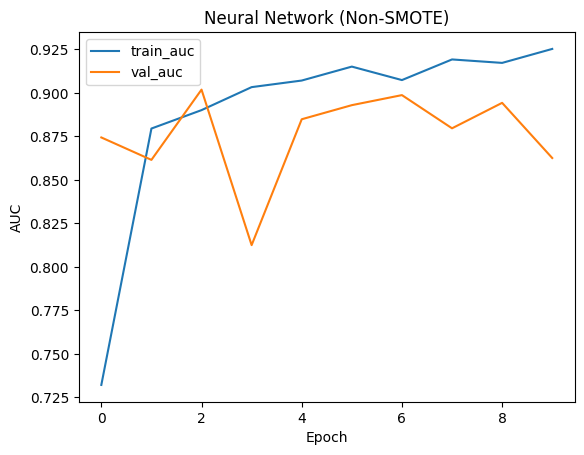

In [128]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [129]:
y_pred_proba = model.predict(thirty_days_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step


In [130]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [131]:
f1_score(thirty_days_y_test, y_pred)

0.029197080291970802

In [132]:
fpr, tpr, _ = roc_curve(thirty_days_y_test, y_pred_proba)
auc(fpr, tpr)

0.9120605910460982

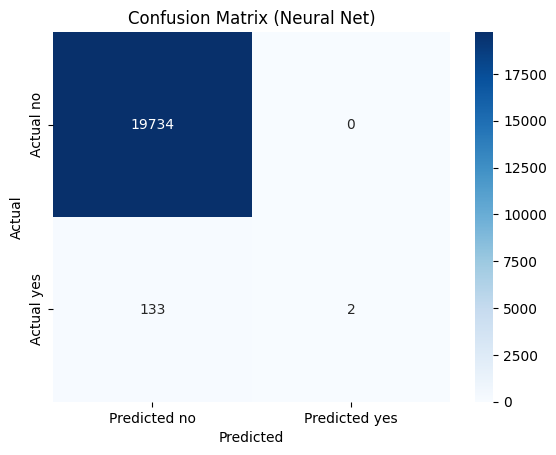

In [133]:
conf_mat = pd.DataFrame(confusion_matrix(thirty_days_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

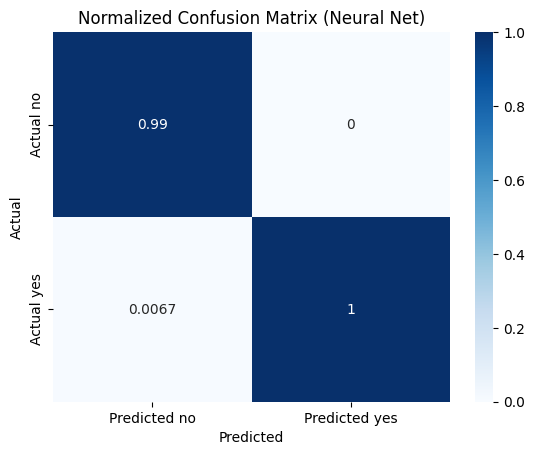

In [134]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [135]:
precision, recall, _ = precision_recall_curve(thirty_days_y_test, y_pred_proba)

In [136]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [137]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [138]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [139]:
model_smote.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
history = model_smote.fit(thirty_days_x_res, thirty_days_y_res, epochs=10, batch_size=32, validation_data=(thirty_days_x_test, thirty_days_y_test))

Epoch 1/10
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - auc: 0.9391 - f1_score: 0.6668 - loss: 0.3113 - val_auc: 0.8689 - val_f1_score: 0.0135 - val_loss: 0.3035
Epoch 2/10
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - auc: 0.9689 - f1_score: 0.6702 - loss: 0.2135 - val_auc: 0.8273 - val_f1_score: 0.0143 - val_loss: 0.2586
Epoch 3/10
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - auc: 0.9763 - f1_score: 0.6854 - loss: 0.1829 - val_auc: 0.8167 - val_f1_score: 0.0159 - val_loss: 0.1666
Epoch 4/10
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - auc: 0.9806 - f1_score: 0.7045 - loss: 0.1636 - val_auc: 0.8180 - val_f1_score: 0.0163 - val_loss: 0.2222
Epoch 5/10
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - auc: 0.9823 - f1_score: 0.7150 - loss: 0.1537 - val_auc: 0.8033 - val_f1_score: 0.0173 - val_loss: 0.2221
Epoch 6/10
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - auc: 0.9846 - f1_score: 0.7242 - loss: 0.1428 - val_auc: 0.7771 - val_f1_score: 0.0178 - val_loss: 0.1608
Epoch 7/10
2878/

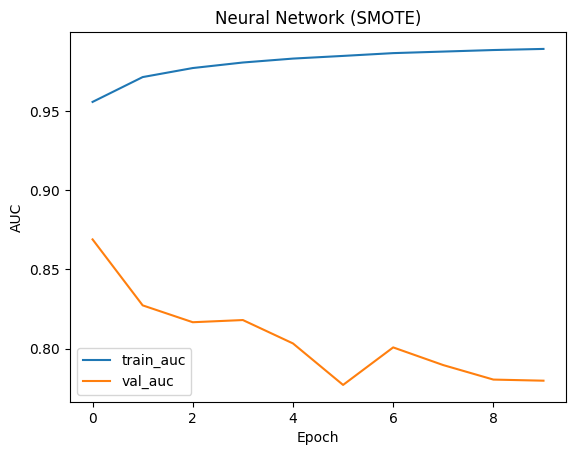

In [141]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [142]:
y_pred_proba = model_smote.predict(thirty_days_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step


In [143]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [144]:
f1_score(thirty_days_y_test, y_pred)

0.09424083769633508

In [145]:
fpr, tpr, _ = roc_curve(thirty_days_y_test, y_pred_proba)
auc(fpr, tpr)

0.817422647132792

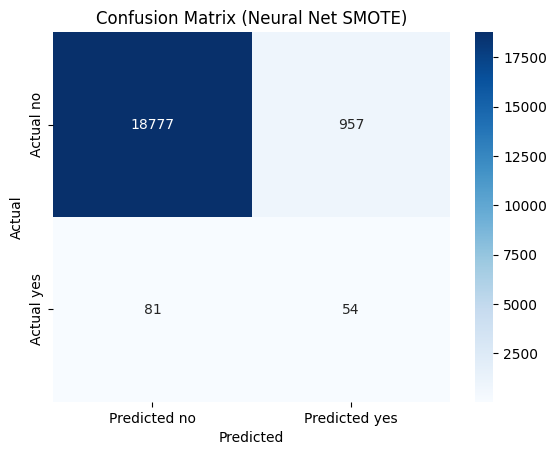

In [146]:
conf_mat = pd.DataFrame(confusion_matrix(thirty_days_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

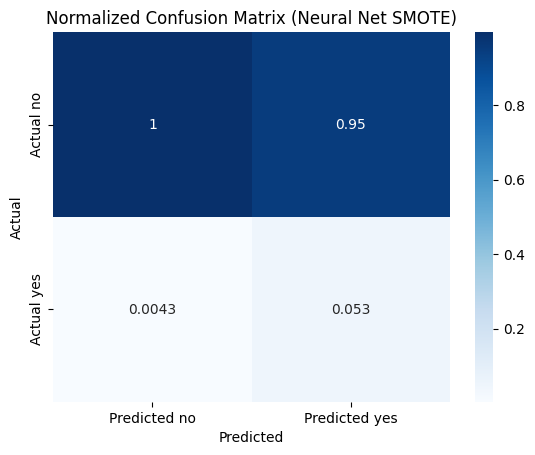

In [147]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [148]:
precision, recall, _ = precision_recall_curve(thirty_days_y_test, y_pred_proba)

In [149]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

## Comparisons

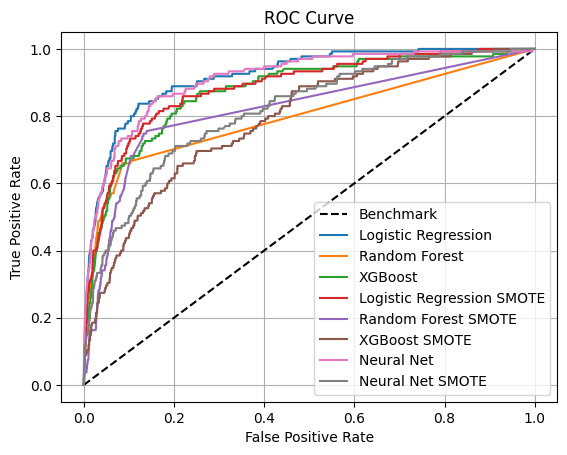

In [150]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

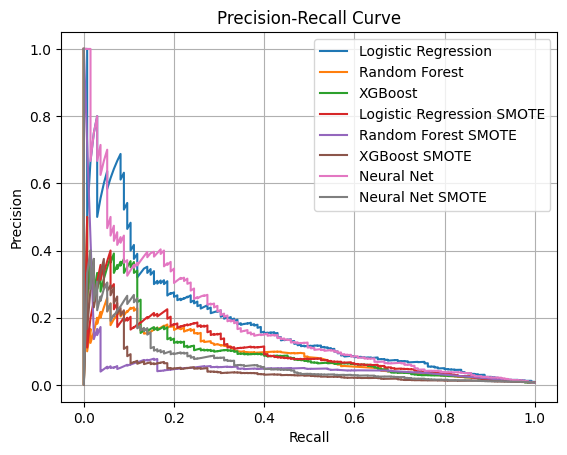

In [151]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()